<a href="https://colab.research.google.com/github/Adler-1014/SNU_ML_GROUP2/blob/JY/real_TEST_jy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MLDL/data_jy.csv')

In [4]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,0.016047,249.8092,1999,3735.1380,284.0
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,0.019278,48.2692,2009,443.4228,57.0
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,0.016760,141.6180,1999,2097.2700,375.0
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,0.000000,182.0950,1998,732.3800,392.0
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,0.000000,53.8614,1987,994.7052,265.0


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Outlet_Identifier          8523 non-null   object 
 4   Outlet_Size                8523 non-null   object 
 5   Outlet_Location_Type       8523 non-null   object 
 6   Outlet_Type                8523 non-null   object 
 7   Item_Visibility            8523 non-null   float64
 8   Item_MRP                   8523 non-null   float64
 9   Outlet_Establishment_Year  8523 non-null   int64  
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Item_Weight                8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## dummy화

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
# 범주형 선택
categorical_columns = df.select_dtypes(include=['object']).columns
# OneHotEncoder 객체 생성
one_hot_encoder = OneHotEncoder()
dummy_variables = one_hot_encoder.fit_transform(df[categorical_columns])

dummy_df = pd.DataFrame(dummy_variables.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_columns))

In [9]:
#float과 int만 선택한 데이터프레임
numerical_df = df.select_dtypes(include=['float', 'int'])

# numerical, dummy 데이터프레임 합치기
final_df = pd.concat([numerical_df, dummy_df], axis=1)

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1602 entries, Item_Visibility to Outlet_Type_Supermarket Type3
dtypes: float64(1601), int64(1)
memory usage: 104.2 MB


In [11]:
final_df.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Item_Weight', 'Item_Identifier_DRA12',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       ...
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1602)

# Train and test set 설정

In [13]:
from sklearn.model_selection import train_test_split

X = final_df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# Real Test Set 데려오기

In [18]:
TEST = pd.read_csv('/content/drive/MyDrive/MLDL/data_jy.csv')

## 1.gbr

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
# Gradient Boosting Regressor 모델 생성 및 훈련
gbr = GradientBoostingRegressor(random_state=51)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=51)

In [16]:
# 테스트 데이터에 대한 예측
y_pred = gbr.predict(X_test)

# 성능 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 보고서 출력
print("---------------------------------")
print("gbr Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("---------------------------------")

---------------------------------
gbr Regression Report:
Mean Absolute Error (MAE): 763.74
Mean Squared Error (MSE): 1190728.12
Root Mean Squared Error (RMSE): 1091.20
R-squared (R2): 0.58
---------------------------------


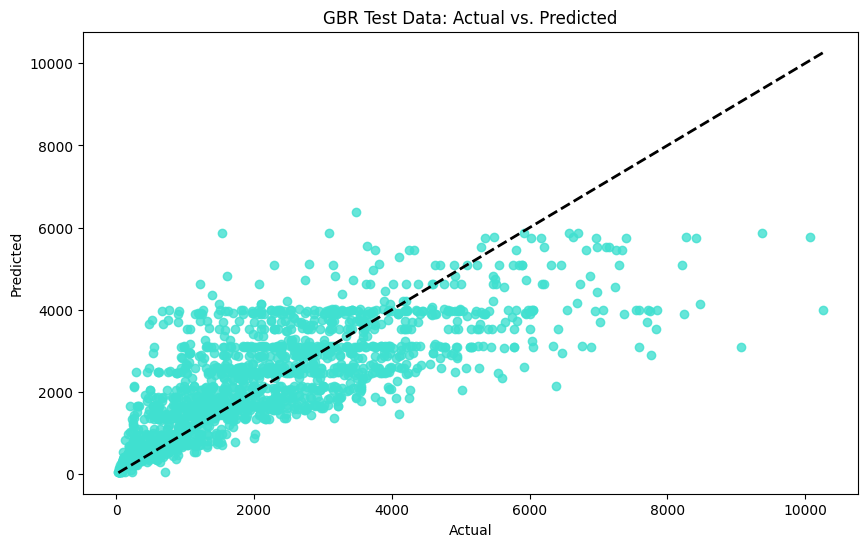

In [17]:
# 실제 값과 예측 값을 그래프로 비교
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_test, y_pred, alpha=0.8, color='turquoise')  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('GBR Test Data: Actual vs. Predicted')  # 그래프 제목
plt.show()

## 1-1. 실제 테스트

In [21]:
# 범주형 선택
categorical_columns = TEST.select_dtypes(include=['object']).columns
# OneHotEncoder 객체 생성
one_hot_encoder = OneHotEncoder()
dummy_variables = one_hot_encoder.fit_transform(TEST[categorical_columns])

dummy_TEST = pd.DataFrame(dummy_variables.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_columns))

#float과 int만 선택한 데이터프레임
numerical_TEST = TEST.select_dtypes(include=['float', 'int'])

# numerical, dummy 데이터프레임 합치기
TEST = pd.concat([numerical_TEST, dummy_TEST], axis=1)

In [22]:
TEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1602 entries, Item_Visibility to Outlet_Type_Supermarket Type3
dtypes: float64(1601), int64(1)
memory usage: 104.2 MB


In [23]:
X_TEST = TEST.drop('Item_Outlet_Sales', axis=1)
y_TEST = TEST['Item_Outlet_Sales']

# TEST 데이터에 대한 예측 수행
y_TEST_pred = gbr.predict(X_TEST)

# TEST 데이터에 대한 성능 지표 계산
test_mae = mean_absolute_error(y_TEST, y_TEST_pred)
test_mse = mean_squared_error(y_TEST, y_TEST_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_TEST, y_TEST_pred)

# TEST 데이터 세트에 대한 평가 보고서 출력
print("---------------------------------")
print("GBR TEST Data Regression Report:")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"R-squared (R2): {test_r2:.2f}")
print("---------------------------------")


---------------------------------
GBR TEST Data Regression Report:
Mean Absolute Error (MAE): 736.79
Mean Squared Error (MSE): 1077076.84
Root Mean Squared Error (RMSE): 1037.82
R-squared (R2): 0.63
---------------------------------


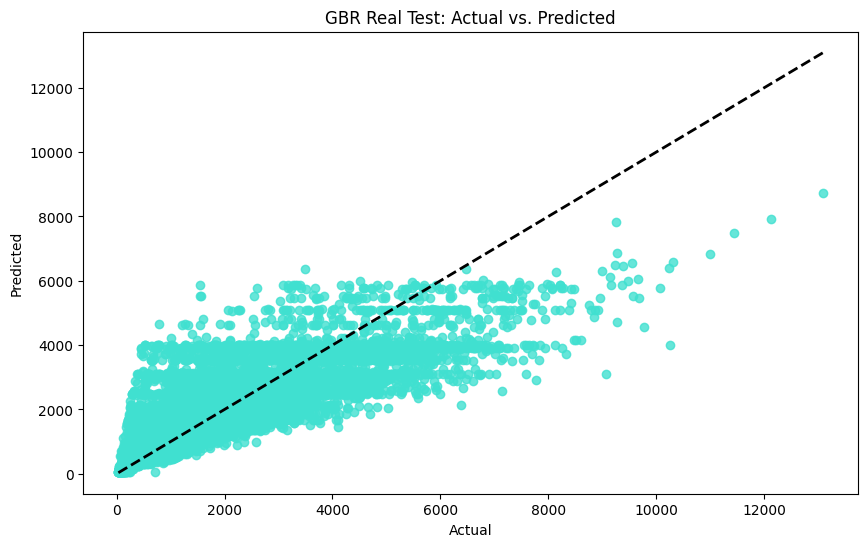

In [24]:
# 실제 값과 예측 값을 그래프로 비교
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_TEST, y_TEST_pred, alpha=0.8, color='turquoise')  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_TEST.min(), y_TEST.max()], [y_TEST.min(), y_TEST.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('GBR Real Test: Actual vs. Predicted')  # 그래프 제목
plt.show()

## 2. LightGBM

In [26]:
import lightgbm as lgb

In [55]:
# LightGBM 데이터셋으로 변환
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [56]:
# 매개변수 설정
params = {
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'objective': 'regression',  # 회귀 문제
    'metric': 'r2',  # 평가 기준으로 R2 사용
    'num_leaves': 31,  # 트리의 잎의 수
    'learning_rate': 0.05,  # 학습률
    'feature_fraction': 0.9,  # 각 반복에서 무작위로 선택되는 특성의 비율
    'bagging_fraction': 0.8,  # 각 반복에서 무작위로 선택되는 데이터의 비율
    'bagging_freq': 5,  # bagging을 적용할 반복 횟수
    'verbose': 0  # 실행 중 정보 출력 설정 (0은 출력 안 함)
}

In [59]:
# 공백을 밑줄로 대체
df.columns = df.columns.str.replace(' ', '_')

# 변경된 열 이름 확인
print(df.columns)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Weight'],
      dtype='object')


In [60]:
# 모델 학습
num_round = 100  # 부스팅 반복 횟수
model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [61]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 보고서 출력
print("---------------------------------")
print("lgb model Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("---------------------------------")

---------------------------------
lgb model Regression Report:
Mean Absolute Error (MAE): 764.68
Mean Squared Error (MSE): 1206674.07
Root Mean Squared Error (RMSE): 1098.49
R-squared (R2): 0.58
---------------------------------


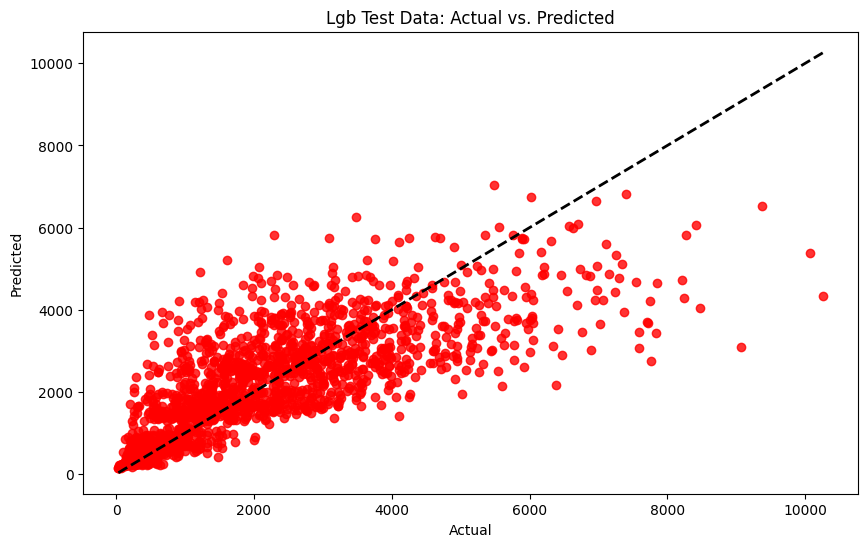

In [62]:
# 실제 값과 예측 값을 그래프로 비교
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_test, y_pred, alpha=0.8, color='red')  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('Lgb Test Data: Actual vs. Predicted')  # 그래프 제목
plt.show()

## 2-1. 실제 테스트

In [63]:
# LightGBM 테스트 데이터 셋으로 변환
TEST_data = lgb.Dataset(X_TEST, label=y_TEST, reference=train_data)

# 테스트 데이터에 대한 예측
y_TEST_pred = model.predict(X_TEST)

# 성능 지표 계산
mae = mean_absolute_error(y_TEST, y_TEST_pred)
mse = mean_squared_error(y_TEST, y_TEST_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_TEST, y_TEST_pred)

# 보고서 출력
print("---------------------------------")
print("lgb real TEST model Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("---------------------------------")

---------------------------------
lgb real TEST model Regression Report:
Mean Absolute Error (MAE): 700.33
Mean Squared Error (MSE): 977067.01
Root Mean Squared Error (RMSE): 988.47
R-squared (R2): 0.66
---------------------------------


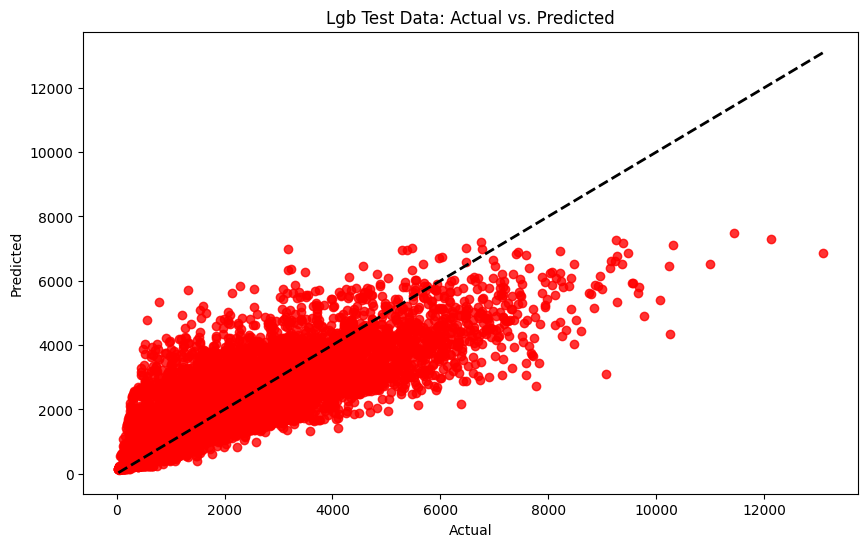

In [64]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_TEST, y_TEST_pred, alpha=0.8, color='red')  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_TEST.min(), y_TEST.max()], [y_TEST.min(), y_TEST.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('Lgb Test Data: Actual vs. Predicted')  # 그래프 제목
plt.show()

## 3. CatBoost

In [39]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.9 MB/s eta 0:00:00


In [43]:
from catboost import CatBoostRegressor

# CatBoost 회귀 모델 생성
cat = CatBoostRegressor(random_seed=51, verbose=0)  # verbose=0은 학습 과정 중 메시지 출력을 제한

# 모델 학습
cat.fit(X_train, y_train)

# 예측
y_pred = cat.predict(X_test)

# 성능 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 보고서 출력
print("---------------------------------")
print("catBoost model Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("---------------------------------")

---------------------------------
catBoost model Regression Report:
Mean Absolute Error (MAE): 772.32
Mean Squared Error (MSE): 1222184.14
Root Mean Squared Error (RMSE): 1105.52
R-squared (R2): 0.57
---------------------------------


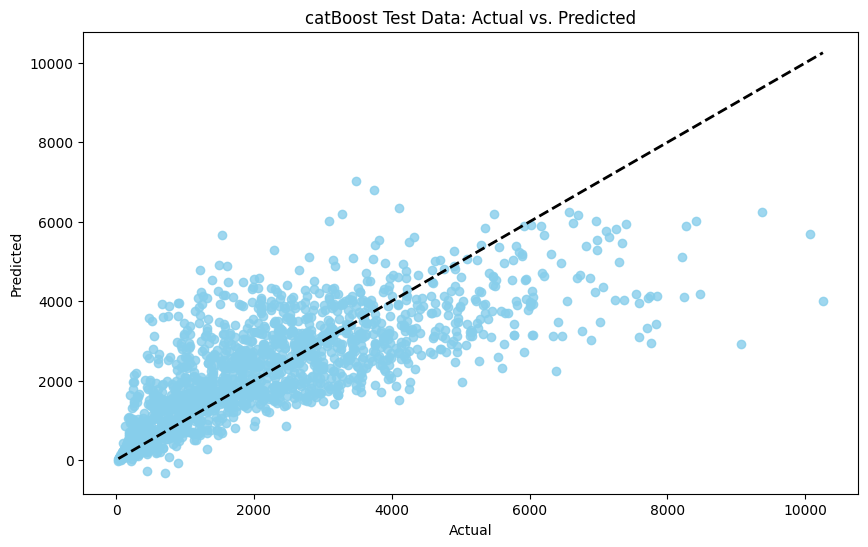

In [44]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_test, y_pred, alpha=0.8, color='skyblue')  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('catBoost Test Data: Actual vs. Predicted')  # 그래프 제목
plt.show()

## 3-1. 실제 테스트

In [77]:
# 테스트 데이터에 대한 예측
y_TEST_pred = cat.predict(X_TEST)

# 성능 지표 계산
mae = mean_absolute_error(y_TEST, y_TEST_pred)
mse = mean_squared_error(y_TEST, y_TEST_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_TEST, y_TEST_pred)

# 보고서 출력
print("---------------------------------")
print("lgb real TEST model Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("---------------------------------")


---------------------------------
lgb real TEST model Regression Report:
Mean Absolute Error (MAE): 703.14
Mean Squared Error (MSE): 950536.92
Root Mean Squared Error (RMSE): 974.95
R-squared (R2): 0.67
---------------------------------


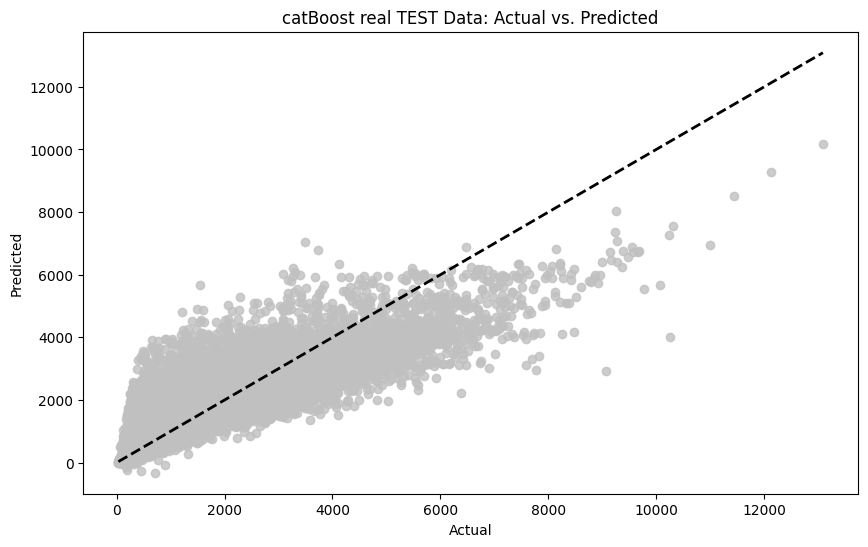

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_TEST, y_TEST_pred, alpha=0.8, color='silver')
plt.plot([y_TEST.min(), y_TEST.max()], [y_TEST.min(), y_TEST.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('catBoost real TEST Data: Actual vs. Predicted')  # 그래프 제목
plt.show()

## 4. XGBoost

In [47]:
import xgboost as xgb

In [48]:
# XGBoost 데이터셋으로 변환
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [67]:
# 매개변수 설정
params = {
    'max_depth': 3,  # 트리의 최대 깊이
    'eta': 0.1,      # 학습률
    'objective': 'reg:squarederror'
}

# 모델 학습
num_round = 100  # 부스팅 반복 횟수
bst = xgb.train(params, dtrain, num_round, [(dtest, 'test')])

# 테스트 데이터에 대한 예측 수행
y_pred = bst.predict(dtest)

# 성능 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 보고서 출력
print("---------------------------------")
print("XGBoost model Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("---------------------------------")

[0]	test-rmse:1605.76056
[1]	test-rmse:1531.34248
[2]	test-rmse:1465.18935
[3]	test-rmse:1408.74039
[4]	test-rmse:1361.11557
[5]	test-rmse:1320.90299
[6]	test-rmse:1286.70477
[7]	test-rmse:1256.16162
[8]	test-rmse:1229.31692
[9]	test-rmse:1207.43420
[10]	test-rmse:1187.72995
[11]	test-rmse:1172.23057
[12]	test-rmse:1159.44804
[13]	test-rmse:1147.65834
[14]	test-rmse:1137.71094
[15]	test-rmse:1129.69371
[16]	test-rmse:1122.80024
[17]	test-rmse:1115.47628
[18]	test-rmse:1110.80799
[19]	test-rmse:1105.25805
[20]	test-rmse:1102.07583
[21]	test-rmse:1097.88938
[22]	test-rmse:1095.91932
[23]	test-rmse:1093.88551
[24]	test-rmse:1091.01709
[25]	test-rmse:1088.89800
[26]	test-rmse:1088.10073
[27]	test-rmse:1087.97354
[28]	test-rmse:1087.08513
[29]	test-rmse:1086.51332
[30]	test-rmse:1086.29872
[31]	test-rmse:1085.86621
[32]	test-rmse:1085.42065
[33]	test-rmse:1085.66730
[34]	test-rmse:1085.62243
[35]	test-rmse:1086.16737
[36]	test-rmse:1085.62736
[37]	test-rmse:1085.43883
[38]	test-rmse:1085.42

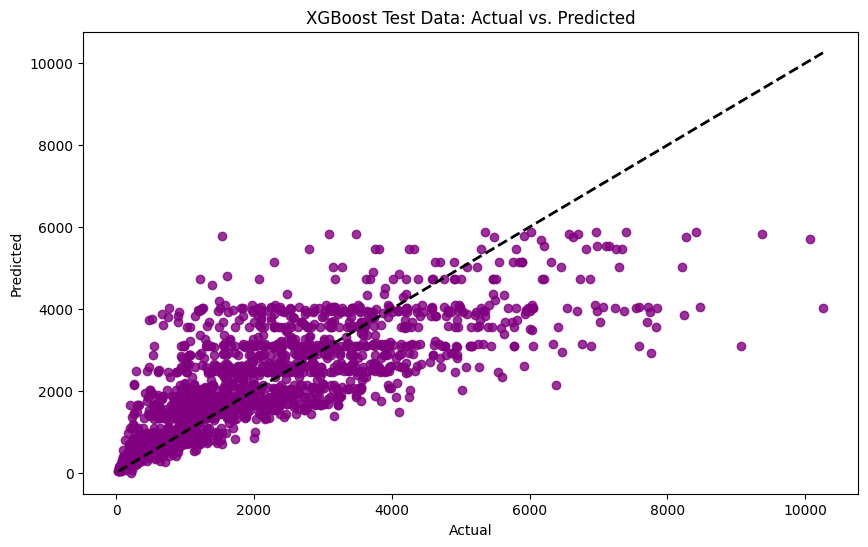

In [76]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_test, y_pred, alpha=0.8, color='purple')  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('XGBoost Test Data: Actual vs. Predicted')  # 그래프 제목
plt.show()

### 4-1. 실제 데이터

In [69]:
Dtest = xgb.DMatrix(X_TEST, label=y_TEST)

In [71]:
y_TEST_pred = bst.predict(Dtest)

# 성능 지표 계산
mae = mean_absolute_error(y_TEST, y_TEST_pred)
mse = mean_squared_error(y_TEST, y_TEST_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_TEST, y_TEST_pred)

# 보고서 출력
print("---------------------------------")
print("XGBoost real TEST Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("---------------------------------")

---------------------------------
XGBoost real TEST Regression Report:
Mean Absolute Error (MAE): 740.57
Mean Squared Error (MSE): 1098147.90
Root Mean Squared Error (RMSE): 1047.93
R-squared (R2): 0.62
---------------------------------


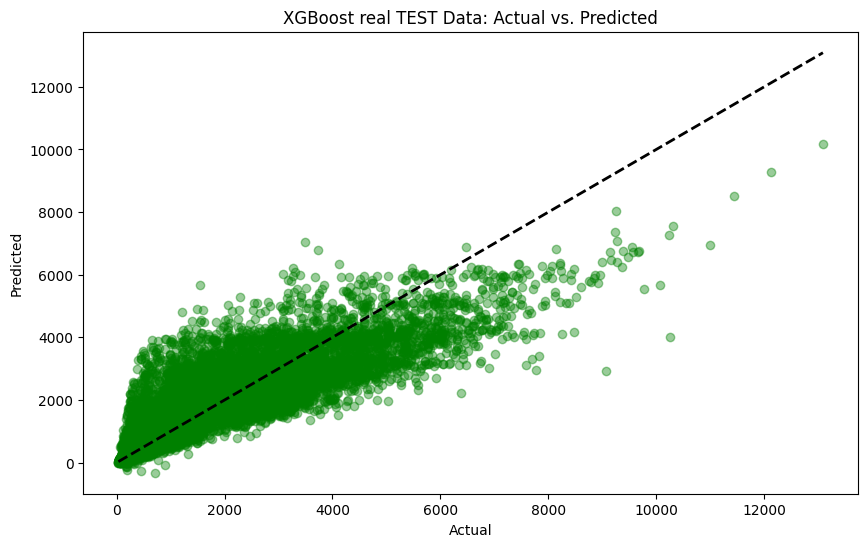

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(y_TEST, y_TEST_pred, alpha=0.4, color='green')
plt.plot([y_TEST.min(), y_TEST.max()], [y_TEST.min(), y_TEST.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost real TEST Data: Actual vs. Predicted')
plt.show()

## 5. Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
# Linear Regression 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 훈련 데이터에 대한 예측
y_train_pred = model.predict(X_train)

# 평가 지표 계산
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

# 평가 보고서 출력
print("------------------------------------------------------")
print("Linear Regression Train set Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("------------------------------------------------------")

------------------------------------------------------
Linear Regression Train set Regression Report:
Mean Absolute Error (MAE): 736.88
Mean Squared Error (MSE): 982601.99
Root Mean Squared Error (RMSE): 991.26
R-squared (R2): 0.66
------------------------------------------------------


In [82]:
# 테스트 데이터에 대한 예측
y_test_pred = model.predict(X_test)

# 테스트 데이터에 대한 평가 지표 계산
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # RMSE는 MSE의 제곱근입니다.
test_r2 = r2_score(y_test, y_test_pred)

# 테스트 세트 평가 보고서 출력
print("------------------------------------------------------")
print("Linear Regression Test set Regression Report:")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"R-squared (R2): {test_r2:.2f}")
print("------------------------------------------------------")


------------------------------------------------------
Linear Regression Test set Regression Report:
Mean Absolute Error (MAE): 949.16
Mean Squared Error (MSE): 1650985.36
Root Mean Squared Error (RMSE): 1284.91
R-squared (R2): 0.42
------------------------------------------------------


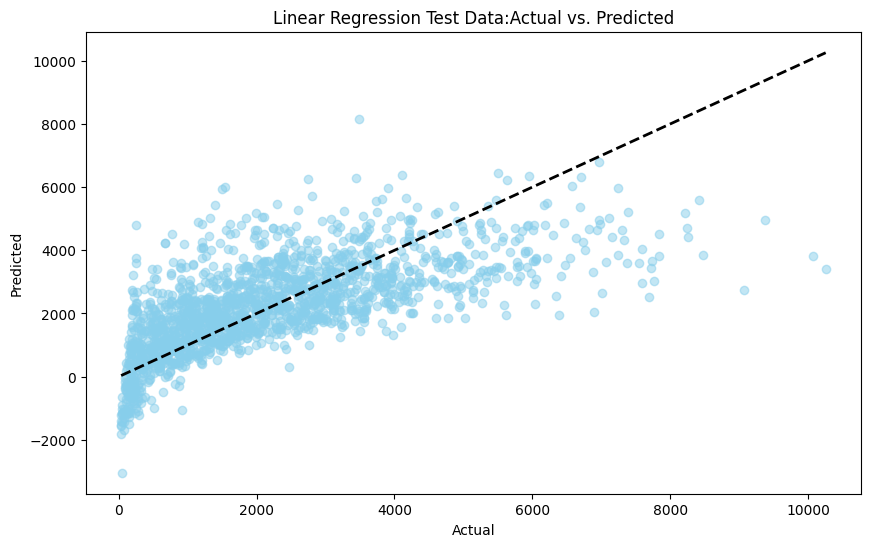

In [86]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_test, y_test_pred, color='skyblue', alpha=0.5)  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('Linear Regression Test Data:Actual vs. Predicted')  # 그래프 제목
plt.show()


## 5-1-1. 실제 데이터

In [84]:
# 테스트 데이터에 대한 예측
y_TEST_pred = model.predict(X_TEST)

# 테스트 데이터에 대한 평가 지표 계산
test_mae = mean_absolute_error(y_TEST, y_TEST_pred)
test_mse = mean_squared_error(y_TEST, y_TEST_pred)
test_rmse = np.sqrt(test_mse)  # RMSE는 MSE의 제곱근입니다.
test_r2 = r2_score(y_TEST, y_TEST_pred)

# 테스트 세트 평가 보고서 출력
print("------------------------------------------------------")
print("Linear Regression real TEST Regression Report:")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"R-squared (R2): {test_r2:.2f}")
print("------------------------------------------------------")


------------------------------------------------------
Linear Regression real TEST Regression Report:
Mean Absolute Error (MAE): 779.35
Mean Squared Error (MSE): 1116310.03
Root Mean Squared Error (RMSE): 1056.56
R-squared (R2): 0.62
------------------------------------------------------


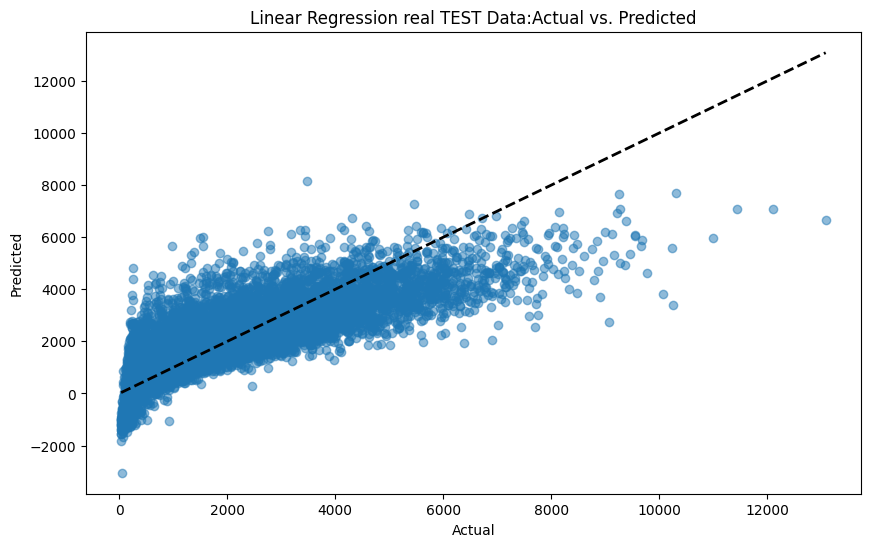

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_TEST, y_TEST_pred, alpha=0.5)  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_TEST.min(), y_TEST.max()], [y_TEST.min(), y_TEST.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('Linear Regression real TEST Data:Actual vs. Predicted')  # 그래프 제목
plt.show()


### 5-1. 정규화 regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge 회귀 모델 생성 및 학습
ridge_model = Ridge(alpha=1.0)  # alpha는 규제의 강도를 조절합니다.
ridge_model.fit(X_train, y_train)

# Lasso 회귀 모델 생성 및 학습
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# 함수로 평가 결과 출력
def print_regression_report(model, X_train, y_train, X_test, y_test, model_name):
    # 훈련 데이터에 대한 예측 및 평가
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # 테스트 데이터에 대한 예측 및 평가
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # 결과 출력
    print("------------------------------------------------------")
    print(f"{model_name} Train Set Regression Report:")
    print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
    print(f"Mean Squared Error (MSE): {train_mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
    print(f"R-squared (R2): {train_r2:.2f}")
    print("------------------------------------------------------")
    print(f"{model_name} Test Set Regression Report:")
    print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
    print(f"Mean Squared Error (MSE): {test_mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
    print(f"R-squared (R2): {test_r2:.2f}")
    print("------------------------------------------------------")

# 결과 출력
print_regression_report(ridge_model, X_train, y_train, X_test, y_test, "Ridge Regression")
print_regression_report(lasso_model, X_train, y_train, X_test, y_test, "Lasso Regression")


------------------------------------------------------
Ridge Regression Train Set Regression Report:
Mean Absolute Error (MAE): 742.15
Mean Squared Error (MSE): 995809.33
Root Mean Squared Error (RMSE): 997.90
R-squared (R2): 0.66
------------------------------------------------------
Ridge Regression Test Set Regression Report:
Mean Absolute Error (MAE): 904.91
Mean Squared Error (MSE): 1496007.70
Root Mean Squared Error (RMSE): 1223.11
R-squared (R2): 0.48
------------------------------------------------------
------------------------------------------------------
Lasso Regression Train Set Regression Report:
Mean Absolute Error (MAE): 747.10
Mean Squared Error (MSE): 1004918.80
Root Mean Squared Error (RMSE): 1002.46
R-squared (R2): 0.66
------------------------------------------------------
Lasso Regression Test Set Regression Report:
Mean Absolute Error (MAE): 900.82
Mean Squared Error (MSE): 1507244.63
Root Mean Squared Error (RMSE): 1227.70
R-squared (R2): 0.47
-----------------

## 6.SVR

In [36]:
from sklearn.svm import SVR

# SVR 모델 생성
model = SVR(kernel='rbf', C=150, gamma=0.1, epsilon=.1)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_test_pred = model.predict(X_test)

# 평가 지표 계산
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# 평가 보고서 출력
print("------------------------------------------------------")
print("SVR Test set Regression Report:")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"R-squared (R2): {test_r2:.2f}")
print("------------------------------------------------------")

------------------------------------------------------
SVR Test set Regression Report:
Mean Absolute Error (MAE): 1253.02
Mean Squared Error (MSE): 2821766.57
Root Mean Squared Error (RMSE): 1679.81
R-squared (R2): 0.02
------------------------------------------------------


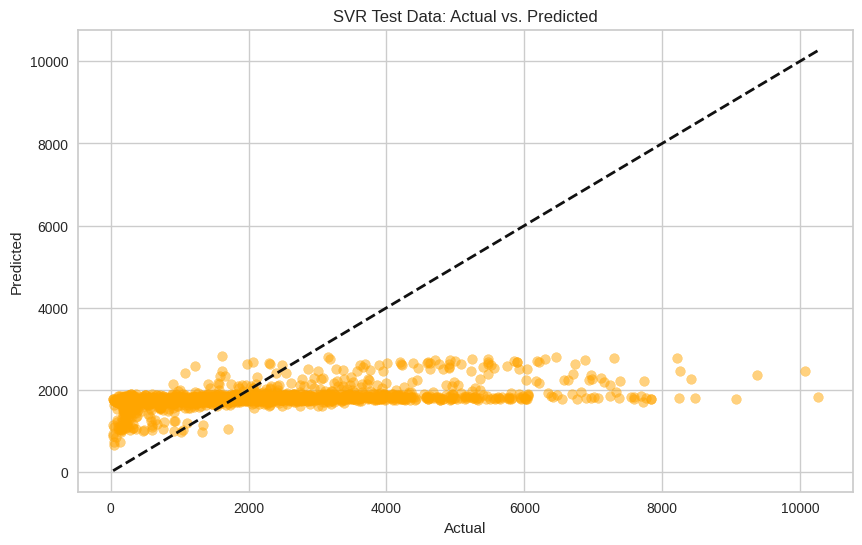

In [ ]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_test, y_test_pred, alpha=0.5, color='orange')  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Test Data: Actual vs. Predicted')
plt.show()




## 7. RandomForest

In [87]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest 회귀 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=51)  # 100개의 트리 사용

# 모델 학습
model.fit(X_train, y_train)

# 훈련 데이터에 대한 예측
y_train_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_train_pred)
mse = mean_squared_error(y_test, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_train_pred)

# 평가 보고서 출력
print("------------------------------------------------------")
print("Random Forest Test Set Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("------------------------------------------------------")


------------------------------------------------------
Random Forest Test Set Regression Report:
Mean Absolute Error (MAE): 789.51
Mean Squared Error (MSE): 1293899.05
Root Mean Squared Error (RMSE): 1137.50
R-squared (R2): 0.55
------------------------------------------------------


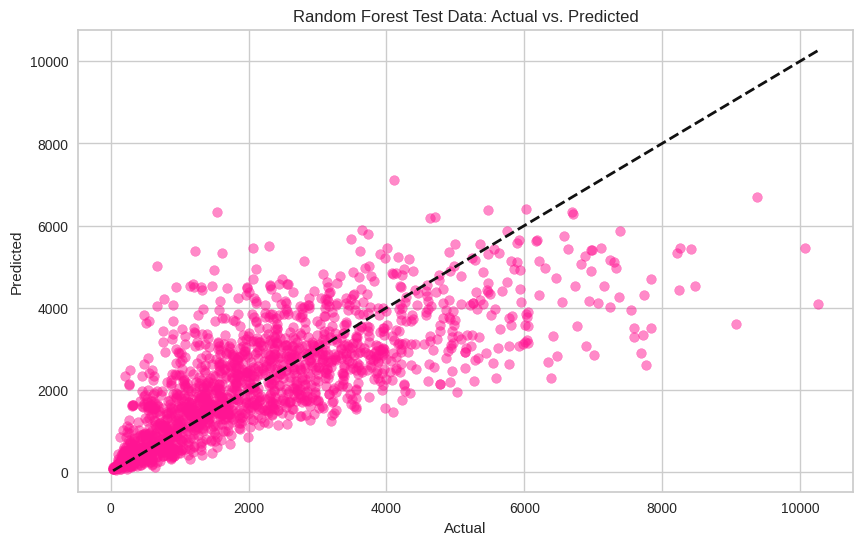

In [ ]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_test, y_train_pred, alpha=0.5, color='deeppink')  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('Random Forest Test Data: Actual vs. Predicted')  # 그래프 제목
plt.show()

## 7-1. 실제 데이터

In [88]:
# 실제 데이터에 대한 예측
y_TEST_pred = model.predict(X_TEST)

# 평가 지표 계산
mae = mean_absolute_error(y_TEST, y_TEST_pred)
mse = mean_squared_error(y_TEST, y_TEST_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_TEST, y_TEST_pred)

# 평가 보고서 출력
print("------------------------------------------------------")
print("Random Forest Test Set Regression Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("------------------------------------------------------")


------------------------------------------------------
Random Forest Test Set Regression Report:
Mean Absolute Error (MAE): 394.72
Mean Squared Error (MSE): 404253.54
Root Mean Squared Error (RMSE): 635.81
R-squared (R2): 0.86
------------------------------------------------------


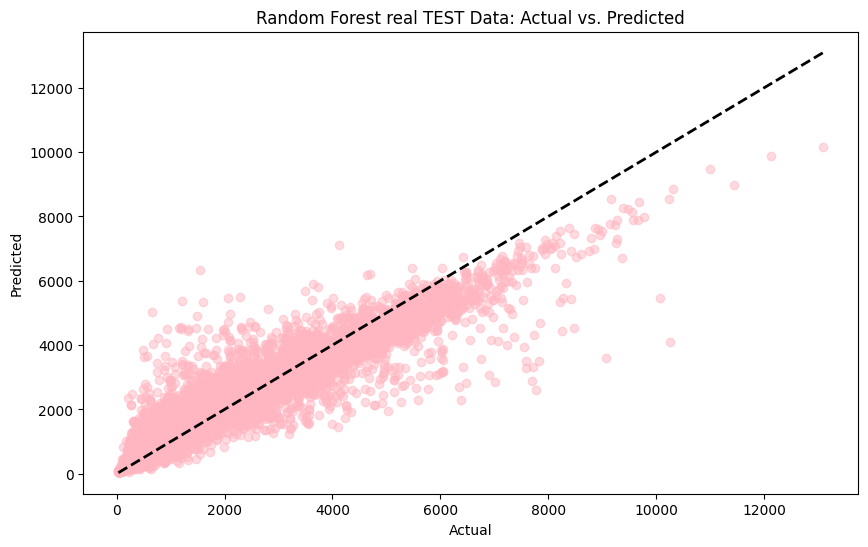

In [89]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(y_TEST, y_TEST_pred, alpha=0.5, color='lightpink')  # 실제 값과 예측 값의 산점도 표시
plt.plot([y_TEST.min(), y_TEST.max()], [y_TEST.min(), y_TEST.max()], 'k--', lw=2)  # 완벽한 예측을 나타내는 대각선
plt.xlabel('Actual')  # x축 라벨
plt.ylabel('Predicted')  # y축 라벨
plt.title('Random Forest real TEST Data: Actual vs. Predicted')  # 그래프 제목
plt.show()